C:\Users\asvik\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


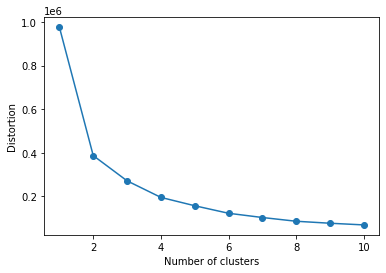

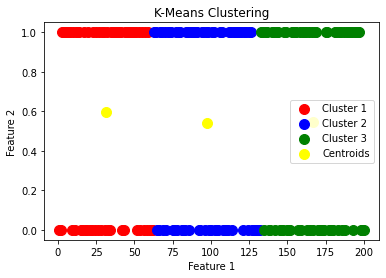

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# load the data
data = pd.read_csv('Mall_customers.csv')

data["Gender"].replace(['Male','Female'],[0,1],inplace = True)

# choose the number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# fit the data using the chosen number of clusters
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
clusters = km.fit_predict(data)

# plot the clusters
plt.scatter(data.iloc[clusters == 0, 0], data.iloc[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data.iloc[clusters == 1, 0], data.iloc[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data.iloc[clusters == 2, 0], data.iloc[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



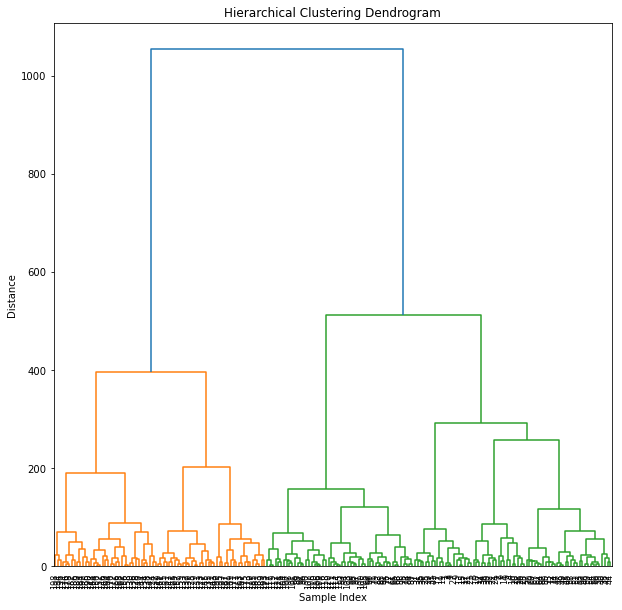

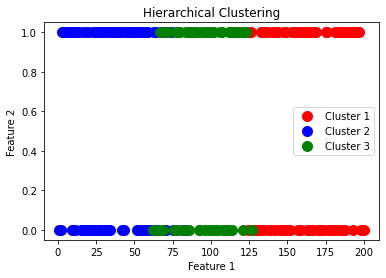

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd


# calculate the linkage matrix
Z = linkage(data, 'ward')

# plot the dendrogram to choose the number of clusters
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# fit the data using the chosen number of clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = hc.fit_predict(data)

# plot the clusters
plt.scatter(data.iloc[clusters == 0, 0], data.iloc[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data.iloc[clusters == 1, 0], data.iloc[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data.iloc[clusters == 2, 0], data.iloc[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
